In [ ]:
###
#Abdulrhman Alajber 
#201650400
###

# Predicting the progression of diabetes using least-squares regression

The **diabetes** data set is provided as a single file, `diabetes-data.csv`. We obtained it at https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data. For some background information on the data, see this seminal paper:

Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.

## Set up notebook and load data set

In [151]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Routines for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
# Set label size for plots
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

This next snippet of code loads in the diabetes data. There are 442 data points, each with 10 predictor variables (which we'll denote `x`) and one response variable (which we'll denote `y`).

Make sure the file `'diabetes-data.csv'` is in the same directory as this notebook.

In [152]:
data = np.genfromtxt('diabetes-data.csv', delimiter=',')
features = ['age', 'sex', 'body mass index', 'blood pressure', 
            'serum1', 'serum2', 'serum3', 'serum4', 'serum5', 'serum6']
x = data[:,0:10] # predictors
y = data[:,10] # response variable

## Predict `y` without using `x`

If we want to predict `y` without knowledge of `x`, what value would be predict? The <font color="magenta">mean</font> value of `y`.

In this case, the mean squared error (MSE) associated with the prediction is simply the variance of `y`.

In [153]:
print ("Prediction: ", np.mean(y))
print ("Mean squared error: ", np.var(y))

print(y.shape)
print(x.shape)


Prediction:  152.13348416289594
Mean squared error:  5929.884896910383
(442,)
(442, 10)


## Predict `y` using a single feature of `x`

To fit a linear regression model, we could directly use the formula we saw in lecture. To make things even easier, this is already implemented in `sklearn.linear_model.LinearRegression()`.

Here we define a function, **one_feature_regression**, that takes `x` and `y`, along with the index `f` of a single feature and fits a linear regressor to `(x[f],y)`. It then plots the data along with the resulting line.

In [154]:
def one_feature_regression(x,y,f):
    if (f < 0) or (f > 9):
        print ("Feature index is out of bounds")
        return
    x1 = x[:,[f]]
    print(x.shape)
    print(y.reshape(-1,1).shape)
    
    ### START CODE HERE ###
    #Craete an object of linear regression
    regr = linear_model.LinearRegression()
    
    
    # call the fit method to fit the regression model
    regr.fit(x[:,:f],y)
    # Make predictions using the model
    y_pred = regr.predict(x[:,:f])
    ### END CODE HERE ###
    
    # Plot data points as well as predictions
    plt.plot(x1, y, 'bo')
    plt.plot(x1, y_pred, 'r-', linewidth=3)
    plt.xlabel(features[f], fontsize=14)
    plt.ylabel('Progression of disease', fontsize=14)
    plt.show()
    print ("Mean squared error: ", mean_squared_error(y, y_pred))
    return regr

Let's try this with feature #2 (body mass index).

(442,)
(442, 10)
(442, 10)
(442, 1)


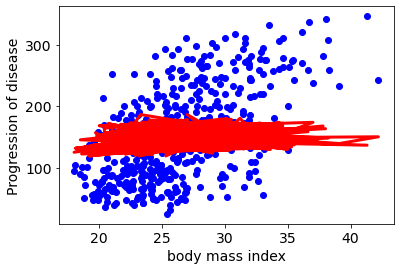

Mean squared error:  5719.883291630833
w =  [1.09398022 1.65787926]
b =  96.62133606410467


In [155]:
print(y.shape)
print(x.shape)
regr = one_feature_regression(x,y,2)
print ("w = ", regr.coef_)
print ("b = ", regr.intercept_)

<font color="magenta">For you to try:</font> Feature #2 ('body mass index') is the single feature that yields the lowest mean squared error. Which feature is the second best? 

In [156]:
### You can use this space to figure out the second-best feature


## Predict `y` using a specified subset of features from `x`

The function **feature_subset_regression** is just like **one_feature_regression**, but this time uses a list of features `flist`.

In [157]:
def feature_subset_regression(x,y,flist):
    if len(flist) < 1:
        print ("Need at least one feature")
        return
    for f in flist:
        if (f < 0) or (f > 9):
            print ("Feature index is out of bounds")
            return

    ### START CODE HERE ###
    #Craete an object of linear regression
    regr = linear_model.LinearRegression()
    print(x[:,flist].shape)
    print(y.shape)
    # call the fit method to fit the regression model
    regr.fit(x[:,flist], y)

    ### END CODE HERE ###
    return regr

Try using just features #2 (body mass index) and #8 (serum5).

In [158]:
flist = [2,8]
regr = feature_subset_regression(x,y,[2,8])
print ("w = ", regr.coef_)
print ("b = ", regr.intercept_)
print ("Mean squared error: ", mean_squared_error(y, regr.predict(x[:,flist])))

(442, 2)
(442,)
w =  [ 7.27600054 56.05638703]
b =  -299.95751508023613
Mean squared error:  3205.190076824853


Finally, use all 10 features.

In [159]:
regr = feature_subset_regression(x,y,range(0,10))
print ("w = ", regr.coef_)
print ("b = ", regr.intercept_)
print ("Mean squared error: ", mean_squared_error(y, regr.predict(x)))

(442, 10)
(442,)
w =  [-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]
b =  -334.56713851878703
Mean squared error:  2859.6963475867506


## Splitting the data into a training and test set

We define a procedure **split_data** that partitions the data set into separate training and test sets. It is invoked as follows:

* `trainx, trainy, testx, testy = split_data(n_train)`

Here:
* `n_train` is the desired number of training points
* `trainx` and `trainy` are the training points and response values
* `testx` and `testy` are the test points and response values

The split is done randomly, but the random seed is fixed, and thus the same split is produced if the procedure is called repeatedly with the same `n_train` parameter.
**Note:** You can also use python built-in libraries for splitting data like:
`from sklearn.model_selection import train_test_split`

In [160]:
def split_data(n_train):
    if (n_train < 0) or (n_train > 442):
        print ("Invalid number of training points")
        return
    np.random.seed(0)
    perm = np.random.permutation(442)
    training_indices = perm[range(0,n_train)]
    test_indices = perm[range(n_train,442)]
    trainx = x[training_indices,:]
    trainy = y[training_indices]
    testx = x[test_indices,:]
    testy = y[test_indices]
    return trainx, trainy, testx, testy

## Implementing the closed-form solution

We define a procedure **split_data** that partitions the data set into separate training and test sets. It is invoked as follows:

* `trainx, trainy, testx, testy = split_data(n_train)`

Here:
* `n_train` is the desired number of training points
* `trainx` and `trainy` are the training points and response values
* `testx` and `testy` are the test points and response values

The split is done randomly, but the random seed is fixed, and thus the same split is produced if the procedure is called repeatedly with the same `n_train` parameter.
**Note:** You can also use python built-in libraries for splitting data like:
`from sklearn.model_selection import train_test_split`

To fit a linear regression model, we can directly use the closed-form formula we saw in lecture. Implement a method to get the parameters of the linear regression using the closed-form solution. The method should take features `x` and predictions `y` of the training set and return back the parameter values including the bias term.

In [161]:
def linear_regression_CF(trainx, trainy):
    # inputs: trainx and trainy, the features and the target in the training set
    # output: a vector of weights including the bias term
    
    ### START CODE HERE ###
    
    
    X = trainx
    print(X.shape)
    X_b = np.c_[np.ones((X.shape[0],1)),X]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(trainy)
    print(theta.T.shape)
    return theta
    ### END CODE HERE ###

In [162]:
trainx, trainy, testx, testy = split_data(100)
theta = linear_regression_CF(trainx, trainy)
testx_b = np.c_[np.ones((testx.shape[0],1)),testx]
pred_cf = testx_b.dot(theta)

print(pred_cf)



(100, 10)
(11,)
[199.01577321  86.62182019  93.62305848 127.56506985 195.47172961
 143.21667294 173.87028526 201.91039225 105.47770443 120.52323399
 190.71112881 125.40135767  28.14686402  89.2300008  109.41065976
 203.92632767 224.52570606 137.16056669 248.48042294 138.56503848
 133.14312927 119.56391636  70.22782917 217.92309532 112.76723831
 130.22681777 160.6954651  184.25373562 178.14803091 166.80802826
 183.36473076 120.77444135 177.41043174 164.37626683  80.65265703
 180.70284983 151.64213932 122.2473643   60.71902277 128.04754217
 103.90293886 207.87409253 158.54205097  59.70555167 132.07034031
 114.0645142   59.83100335  85.25018707 136.60728529 134.6326126
 194.71447248 146.97438075 217.05078833 207.29573576 137.25569037
  98.12994554  89.99095138 172.52116367 151.85842141 170.55306252
 246.91889402 162.59728961 121.35723214 141.46785321  78.31562517
 156.78336757 191.62257549 180.67562409 122.40539026  33.95401697
 150.32931668 214.87840873 190.23103201 166.98880866 133.8987

In [164]:
# by comparing the colsed formula with sklearn built in function we got the same result
# which indicating that the implementation is correct!

linear_r = linear_model.LinearRegression()
linear_r.fit(trainx,trainy)
print(linear_r.predict(testx))


[199.01577321  86.62182019  93.62305848 127.56506985 195.47172961
 143.21667294 173.87028526 201.91039225 105.47770443 120.52323399
 190.71112881 125.40135767  28.14686402  89.2300008  109.41065976
 203.92632767 224.52570606 137.16056669 248.48042294 138.56503848
 133.14312927 119.56391636  70.22782917 217.92309532 112.76723832
 130.22681777 160.6954651  184.25373562 178.14803091 166.80802826
 183.36473076 120.77444135 177.41043174 164.37626683  80.65265703
 180.70284983 151.64213932 122.2473643   60.71902277 128.04754217
 103.90293886 207.87409253 158.54205097  59.70555167 132.07034031
 114.0645142   59.83100335  85.25018707 136.60728529 134.6326126
 194.71447248 146.97438075 217.05078833 207.29573576 137.25569037
  98.12994554  89.99095138 172.52116367 151.85842141 170.55306252
 246.91889402 162.59728961 121.35723214 141.46785321  78.31562517
 156.78336757 191.62257549 180.67562409 122.40539026  33.95401697
 150.32931668 214.87840873 190.23103201 166.98880866 133.89876755
 187.883611

## Implementing the iterative solution

In this section, you you are required to implement the iterative (gradient descent) solution. The method should take features `x` and predictions `y` of the training set and return back the parameter values including the bias term. You should also initialize the hyper-parameters in the beginning of the method. Also, plot the the cost function at different iterations.
Here, the input consists of:
* training data `trainx, trainy`, where `trainx` and `trainy` are numpy arrays of dimension `m`-by-`n` and `m`, respectively (if there are `m` training points and `n` features)

The function should find the `n`-dimensional vector `w` and offset `b` that minimize the MSE loss function, and return:
* `w` and `b`
* `losses`, an array containing the MSE loss at each iteration

<font color="magenta">Advice:</font> First figure out the derivative, which has a relatively simple form. Next, when implementing gradient descent, think carefully about two issues.

1. What is the step size (learning rate)?
2. When has the procedure converged?

Take the time to experiment with different ways of handling these.

**Note:** You can use additional methods as helpers if you feel the need.

**Note:** MSE is the RSS value divided by the number of samples to get the mean.

In [165]:
# def linear_regression_GD(trainx, trainy):
#     # inputs: trainx and trainy, the features and the target in the training set
#     # output: a vector of weights including the bias term
    
#     ### START CODE HERE ###
#     trainy= trainy.reshape(-1,1)
#     X_b = np.c_[np.ones((trainx.shape[0],1)),trainx]
#     print("X_b.shape", X_b.shape)
#     print("trainx.shape", trainx.shape)
#     print("trainy.shape", trainy.shape)
    
#     W = np.zeros((1,trainx.shape[0])) # weight matrix
#     print("W1.shape", W.shape)
#     learning_rate =  0.0001 # learning
#     m = trainx.shape[1] # number of samples
#     y_hat = np.dot(W,X_b)
#     print("yhat.shape", y_hat.shape)
#     epsilon = 0.1
#     convergance = 1 
#     while (convergance > epsilon):
#         #print((y_hat-trainy).shape)
#         cost = 1/(2*m) * np.sum(np.square(y_hat-trainy))
#         dW = 1/m * np.sum(np.dot(y_hat-trainy,X_b.T))
#         #print("dW = ", dW)
#         #print("dW1.shape", dW.shape)    
#         W = W - learning_rate * dW 

#         y_hat = np.dot(W,X_b)
#         cost_new = 1/(2*m) * np.sum(np.square(y_hat-trainy))
#         convergance = (cost_new - cost)
#         print(convergance)

#     return y_hat
# #     ### END CODE HERE ###

In [272]:
# def linear_regression_GD(trainx, trainy):
#     # inputs: trainx and trainy, the features and the target in the training set
#     # output: a vector of weights including the bias term
    
#     ### START CODE HERE ###
#     trainy= trainy.reshape(-1,1)
#     X_b = np.c_[np.ones((trainx.shape[0],1)),trainx]
#     print("X_b.shape", X_b.shape)
#     print("trainx.shape", trainx.shape)
#     print("trainy.shape", trainy.shape)
    
#     W = np.zeros((1,trainx.shape[0])) # weight matrix
#     print("W1.shape", W.shape)
#     learning_rate =  0.000000001 # learning
#     m = trainx.shape[1] # number of samples
#     y_hat = np.dot(W,X_b)
#     print("yhat.shape", y_hat.shape)
#     epsilon = 0.001
#     convergance = 1 
#     while (convergance > epsilon):
        
#         error = trainy - y_hat
#         cost = np.mean(np.power(error, 2))
#         dW = -(1/m) * np.dot(error,X_b.T)
        
           
#         W = W - learning_rate * dW 

#         y_hat = np.dot(W,X_b)
#         error = trainy - y_hat
#         cost_new = np.mean(np.power(error, 2))
#         convergance = np.abs(cost_new - cost)
#         print(convergance)

#     return y_hat
#     ### END CODE HERE ###

In [270]:
def linear_regression_GD(trainx, trainy):
    # inputs: trainx and trainy, the features and the target in the training set
    # output: a vector of weights including the bias term
    
    ### START CODE HERE ###
    trainy= trainy.reshape(-1,1)
    X = trainx
    W = np.zeros((1,trainx.shape[0])) # weight matrix
    b = 0
    learning_rate =  0.000000001 # learning
    m = trainx.shape[1] # number of samples
    y_hat = np.dot(W,X) + b
    epsilon = 0.001
    convergance = 1 
    losses = []
    iterations = [20,50,100,200,300]
    lis = []
    i = 1
    while (convergance > epsilon):
        
        error = trainy - y_hat
        cost = np.mean(np.power(error, 2))
        dW = -(1/m) * np.dot(error,X.T)
        db = -(1/m) * np.sum(error)
           
        W = W - learning_rate * dW 
        b = b - learning_rate * db 

        y_hat = np.dot(W,X) + b
        error = trainy - y_hat
        cost_new = np.mean(np.power(error, 2))
        convergance = np.abs(cost_new - cost)
        print(convergance)
        
        if i == iterations[0]:
            losses.append(cost)
            lis.append(iterations[0])
            if i < 250:
                iterations.pop(0)
        i += 1  
     
    plt.plot(lis, losses, 'bo')
    plt.xlabel("iterations", fontsize=14)
    plt.ylabel('losses', fontsize=14)
    plt.yticks(losses)
    plt.show()
    return y_hat
    ### END CODE HERE ###

22.398612526485522
22.365458371077693
22.332353346413583
22.299297379704512
22.266290398245474
22.233332329429686
22.200423100795888
22.167562639959215
22.134750874636666
22.101987732698035
22.069273142049497
22.036607030779123
22.003989327022282
21.97141995904167
21.938898855227308
21.906425944038347
21.874001154072175
21.841624414013495
21.809295652641595
21.777014798881282
21.744781781726488
21.71259653028028
21.680458973773057
21.648369041515252
21.616326662948268
21.58433176757171
21.55238428505254
21.520484145112277
21.48863127759614
21.45682561245485
21.42506707973007
21.39335560958716
21.36169113228243
21.330073578170413
21.298502877722058
21.266978961495624
21.235501760176703
21.204071204520005
21.172687225418485
21.141349753841496
21.11005872086389
21.07881405768785
21.047615695573768
21.016463565920276
20.985357600224233
20.95429773005526
20.92328388711394
20.892316003199085
20.861394010185904
20.830517840098764
20.79968742499841
20.76890269710202
20.738163588699535
20.70747

8.470289826145745
8.45777578174966
8.445280281506712
8.432803297899227
8.420344803522312
8.40790477095652
8.39548317284789
8.383079981875198
8.370695170771796
8.358328712281946
8.345980579229945
8.33365074444373
8.321339180809446
8.309045861264167
8.296770758752245
8.284513846290793
8.272275096922385
8.260054483729618
8.247851979827828
8.235667558401474
8.223501192635013
8.211352855778387
8.199222521117917
8.18711016196903
8.175015751701721
8.162939263704175
8.150880671437335
8.138839948369423
8.126817068015953
8.114812003939733
8.102824729750864
8.090855219066725
8.078903445577453
8.06696938298046
8.055053005067748
8.043154285587661
8.031273198394047
8.019409717362578
8.007563816394395
7.995735469434294
7.98392465048164
7.972131333539437
7.960355492701638
7.948597102040367
7.936856135722337
7.925132567903347
7.913426372815593
7.9017375247203745
7.89006599788263
7.878411766661884
7.866774805417663
7.855155088553147
7.843552590526087
7.831967285812425
7.820399148928118
7.808848154436418

2.9720549451703846
2.9676884266918933
2.9633283785224194
2.958974791064975
2.9546276547553134
2.950286960020094
2.9459526973296306
2.9416248571396864
2.9373034299387655
2.9329884062226483
2.9286797764980292
2.9243775312952494
2.920081661148288
2.9157921566147706
2.911509008257781
2.90723220666041
2.9029617424166645
2.8986976061314635
2.894439788435193
2.890188279956419
2.8859430713509937
2.881704153280225
2.8774715164217923
2.873245151471565
2.869025049134507
2.8648112001210393
2.860603595174325
2.8564022250411654
2.8522070804792747
2.848018152255463
2.84383543117292
2.839658908023921
2.8354885736262077
2.8313244188029785
2.8271664344065357
2.8230146112891816
2.8188689403159515
2.8147294123700703
2.810596018360229
2.806468749178748
2.802347595765241
2.7982325490484072
2.794123599976956
2.790020739521424
2.785923958654166
2.7818332483657287
2.7777485996630276
2.7736700035620743
2.769597451093432
2.765530933302216
2.7614704412444553
2.757415965985274
2.753367498622538
2.749325030235923
2

1.127730979646003
1.1260972730251524
1.1244659869644238
1.1228371178585803
1.1212106621333078
1.11958661621793
1.1179649765308568
1.116345739514145
1.1147289016007562
1.1131144592418423
1.1115024088867358
1.1098927469811315
1.108285470001647
1.1066805743976147
1.1050780566565663
1.1034779132369295
1.1018801406371495
1.1002847353283869
1.0986916938145441
1.0971010125904286
1.0955126881544857
1.0939267170142557
1.092343095686374
1.0907618206856569
1.0891828885360155
1.0876062957631802
1.0860320389074332
1.0844601145017805
1.0828905190828664
1.0813232492182578
1.079758301440961
1.078195672325819
1.0766353584258468
1.0750773563140683
1.0735216625707835
1.0719682737671974
1.0704171864872478
1.0688683973239677
1.0673219028740277
1.0657776997304609
1.0642357845026709
1.0626961537964235
1.0611588042320363
1.0596237324207323
1.0580909349973808
1.0565604085841187
1.0550321498139965
1.0535061553346168
1.051982421782668
1.050460945813029
1.0489417240769399
1.0474247532401932
1.0459100299540296
1.0

0.4570521857604035
0.4564120800969249
0.45577292255438806
0.455134711753999
0.45449744626967004
0.45386112471169326
0.4532257456830848
0.4525913077814039
0.45195780961512355
0.45132524979271693
0.45069362692083814
0.4500629396097793
0.4494331864789274
0.44880436613857455
0.44817647720446985
0.44754951830873324
0.4469234880616568
0.44629838508444664
0.4456742080146796
0.44505095547356177
0.44442862608775613
0.4438072185002966
0.4431867313305702
0.4425671632252488
0.4419485128164524
0.4413307787526719
0.44071395966238924
0.44009805420682824
0.43948306101810886
0.43886897874654096
0.4382558060497104
0.43764354157247
0.4370321839724056
0.43642173189982714
0.4358121840250533
0.43520353899111797
0.43459579547925387
0.43398895213977084
0.43338300764298765
0.43277796065376606
0.4321738098497008
0.4315705538938346
0.4309681914674002
0.4303667212425353
0.4297661418986536
0.4291664521115308
0.4285676505678566
0.42796973595068266
0.4273727069448796
0.42677656223168015
0.4261813005159638
0.42558692

0.19599939942054334
0.1957458744636824
0.19549272476615442
0.19523994978044357
0.19498754894266312
0.1947355217052973
0.19448386750627833
0.19423258579990943
0.1939816760350368
0.1937311376514117
0.19348097010879428
0.19323117285239277
0.19298174533469137
0.19273268700635526
0.19248399732350663
0.19223567573681066
0.19198772170420852
0.19174013467454643
0.19149291411304148
0.1912460594703589
0.19099957020262082
0.19075344577504438
0.19050768564011378
0.1902622892648651
0.19001725610178255
0.1897725856215402
0.1895282772857172
0.18928433054497873
0.18904074488273181
0.18879751974782266
0.18855465461274434
0.18831214894817094
0.1880700022156816
0.18782821387867443
0.18758678342055646
0.18734571029381186
0.18710499398730462
0.18686463395351893
0.1866246296776808
0.1863849806268263
0.1861456862789055
0.18590674610459246
0.18566815957638028
0.18542992617767595
0.18519204538097256
0.18495451666240115
0.18471733949991176
0.1844805133787304
0.1842440377749881
0.18400791216663492
0.183772136031

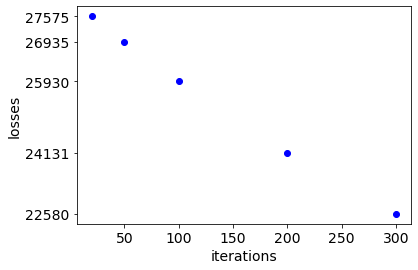

In [271]:
    theta = linear_regression_GD(trainx, trainy)


## Use different amounts of training data to fit the model

Using the **split_data** procedure to partition the data set, compute the training MSE and test MSE when fitting a regressor to *all* features, for the following training set sizes:
* `n_train = 20`
* `n_train = 50`
* `n_train = 100`
* `n_train = 200`
* `n_train = 300`


1. Compare your results for the three approaches, i.e., using library, using closed-form solution (not mandatory), and using the iterative solution. Provide your comments on the results.
2. Compare the parameter values for the three solutions when using `n_train = 300` training samples.

**Analytical Questions:**

3. What changes you need to do if the unit of `y` is different?
4. What changes you need to do if the unit of one of the features was different? For example if **age** was in months and not in years. 
5. What if both 3 and 4 apply?

In [ ]:
trainx, trainy, testx, testy = split_data(300)
linear_r = linear_model.LinearRegression()
linear_r.fit(trainx,trainy)
print("prediction of the built-in function : ",linear_r.predict(testx))
CF = linear_regression_CF(trainx, trainy)
pred_cf = testx_b.dot(CF)
print("prediction of the closed formula solution : ", pred_cf)
GD = linear_regression_GD(trainx, trainy)
pred_GD = testx_b.dot(GD)
print("prediction of the gradient decent approach", pred_GD)


In [ ]:
# 3)
print("in case of changing the unit of y, the unit of x will be have to change also ")
###### 
# 4)

print("in the case of of the ager the esaiest solution will be dividing the all the sample of age by 12 to scale it in years")

######
# 5)

print("there will be no change for weight in this case, but the bias will have to be rescaled ")
